In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_data = pd.read_csv("data.csv",header = None)
df_data

,0,1
0,0,156959
1,0,257228
2,0,511673
3,0,515026
4,0,935083
...,...,...
3708289,979324,540493
3708290,979324,644431
3708291,979324,816168
3708292,979324,855646


In [2]:
nodes = set(list(df_data[0]) + list(df_data[1]))
N = len(nodes)
print(N)
print(len(df_data))

979325
3708294


In [3]:
k_out = df_data[0].value_counts()
k_in = df_data[1].value_counts()
print(k_out)
print(k_in)

0
146404    4574
651712    4143
82768     3662
115692    3566
395947    3555
          ... 
110145       1
324850       1
324851       1
324852       1
66018        1
Name: count, Length: 903376, dtype: int64
1
146404    4519
395947    3783
472127    3368
357724    3308
651712    3270
          ... 
118365       1
586832       1
201087       1
321505       1
340722       1
Name: count, Length: 903792, dtype: int64


In [4]:
next_pos_map = df_data.groupby(0)[1].apply(list).to_dict()
print(next_pos_map[0])
print(next_pos_map[1])

[156959, 257228, 511673, 515026, 935083]
[9077, 83544, 104397, 191282, 258257, 350573, 451081, 635406, 866222, 897911, 941271]


In [5]:
rng = np.random.default_rng()
path = [0]
for _ in range(0,1000000):
    pos = path[-1]
    if pos in next_pos_map:
        npos = next_pos_map[pos]
        path += [npos[rng.integers(0,len(npos))]]
    else:
        path += [rng.integers(0,N)]
len(path)

1000001

In [6]:
pagerank=pd.Series(path).value_counts(normalize=True)
pagerank.head()

146404    0.001194
395947    0.001007
472127    0.000944
651712    0.000887
115692    0.000881
Name: proportion, dtype: float64

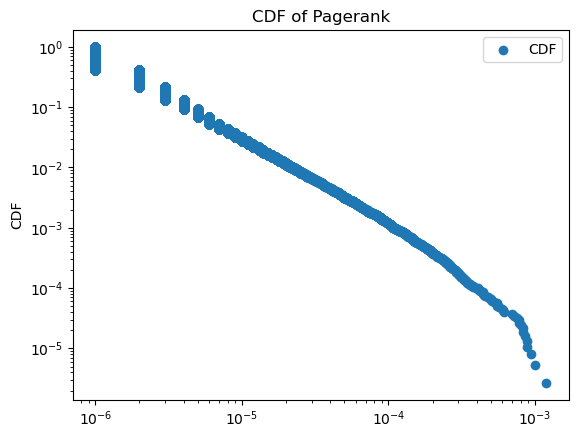

In [7]:
#cdf
x=np.sort(pagerank)
y = np.arange(len(x), 0, -1) / len(x)

plt.title("CDF of Pagerank")
plt.ylabel("CDF")
plt.xscale("log")
plt.yscale("log")
plt.scatter(x, y, label='CDF')
plt.legend()
plt.savefig("PDA_230868_14_1.png")
plt.show()